### Данные по обслуживанию ВС 

https://assaia.com/tmc

In [2]:
import pandas as pd
df = pd.read_csv('export.csv', sep=';')

In [3]:
df

,Name,Time
0,Aircraft parked,19:36:09
1,Chocks on,19:36:27
2,Cargo door open,19:38:03
3,Bridge connected,19:38:30
4,Container out,19:39:09
5,Container out,19:39:39
6,Container out,19:40:09
7,Container out,19:40:39
8,Container out,19:41:09
9,Fueling started,19:41:17


In [4]:
df.dtypes

Name    object
Time    object
dtype: object

In [5]:
# переведем все временные метки из формата object в формат timestamp
df['ts'] = pd.to_datetime('1970-01-01 ' + df.Time).\
    apply(lambda x: int(x.timestamp()))


In [6]:
df

,Name,Time,ts
0,Aircraft parked,19:36:09,70569
1,Chocks on,19:36:27,70587
2,Cargo door open,19:38:03,70683
3,Bridge connected,19:38:30,70710
4,Container out,19:39:09,70749
5,Container out,19:39:39,70779
6,Container out,19:40:09,70809
7,Container out,19:40:39,70839
8,Container out,19:41:09,70869
9,Fueling started,19:41:17,70877


Первое наблюдение: при подсоединении моста в передней грузовой двери это событие не фиксируется.

Событие по открытию двери зафиксировано в 19:53, стыковка моста не зафиксирована.

Предполагаемая причина: ограниченная видимость из-за автолифта-кейтеринга


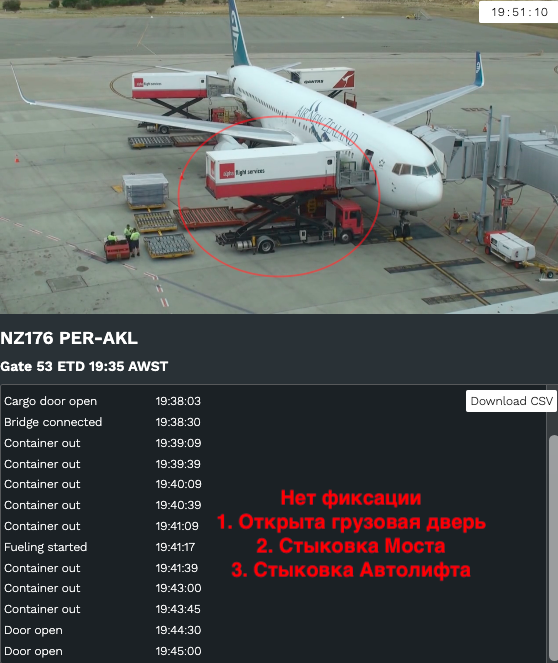

In [7]:
df.dtypes

Name    object
Time    object
ts       int64
dtype: object

In [8]:
# собираем все временные метки в список для каждого вида события
df_ts = df.groupby('Name', as_index=False).agg({'ts': list}).\
    rename(columns={'ts': 'timestamps'})

In [9]:
df_ts

,Name,timestamps
0,Aircraft parked,[70569]
1,Bridge connected,[70710]
2,Bridge disconnected,[74880]
3,Cargo door closed,"[72255, 72945]"
4,Cargo door open,"[70683, 71520]"
5,Chocks off,[73920]
6,Chocks on,[70587]
7,Container in,"[71901, 71970, 72051, 72120]"
8,Container out,"[70749, 70779, 70809, 70839, 70869, 70899, 709..."
9,Door closed,"[71595, 72075]"


In [10]:
# создадим новые столбцы с максимальной и минимальной меткой для каждого типа событий
df_ts['min_ts'] =  df_ts.timestamps.apply(lambda x: min(x))

df_ts['max_ts'] =  df_ts.timestamps.apply(lambda x: max(x))



In [11]:
df_ts

,Name,timestamps,min_ts,max_ts
0,Aircraft parked,[70569],70569,70569
1,Bridge connected,[70710],70710,70710
2,Bridge disconnected,[74880],74880,74880
3,Cargo door closed,"[72255, 72945]",72255,72945
4,Cargo door open,"[70683, 71520]",70683,71520
5,Chocks off,[73920],73920,73920
6,Chocks on,[70587],70587,70587
7,Container in,"[71901, 71970, 72051, 72120]",71901,72120
8,Container out,"[70749, 70779, 70809, 70839, 70869, 70899, 709...",70749,71025
9,Door closed,"[71595, 72075]",71595,72075


In [12]:
# посчитаем количество выполненных операций применительно к каждой операции
#(можно было сделать это на первом этапе группировки, но сейчас уже удобнее так. на больших данных нежелательный способ)

df_ts['num_operations']= df_ts.timestamps.apply(lambda x: len(x))

In [13]:
# отсортируем данные по временным меткам
df_ts.sort_values('timestamps')

,Name,timestamps,min_ts,max_ts,num_operations
0,Aircraft parked,[70569],70569,70569,1
6,Chocks on,[70587],70587,70587,1
4,Cargo door open,"[70683, 71520]",70683,71520,2
1,Bridge connected,[70710],70710,70710,1
8,Container out,"[70749, 70779, 70809, 70839, 70869, 70899, 709...",70749,71025,8
12,Fueling started,[70877],70877,70877,1
10,Door open,"[71070, 71100]",71070,71100,2
9,Door closed,"[71595, 72075]",71595,72075,2
7,Container in,"[71901, 71970, 72051, 72120]",71901,72120,4
11,Fueling ended,[71925],71925,71925,1


    Первичный анализ: мы точно сможем сказать, когда определенный тип операции был начат и полностью завершен.

Например, выгрузка контейнеров началась во временной метке 70749 и полностью завершилась в 71025

Примечательно, что у нас есть данные по открытию/закрытию грузовых дверей. И на первый взгляд кажется, что миниманое значение времени открытия грузовой двери соответствует минимальному значению временной метки закрытия двери.

На самом деле, это ошибочное суждение, что подтверждается видео: задняя грузовая дверь открыта раньше, чем передняя, но закрывается последней (шла загрузка большого числа контейнеров)

    Вывод: при оценке данных без просмотра видео может повлечь непроизвольные ошибки восприятия данных

        Дополнительный нюанс: исходя из нейминга  фиксации событий мы не можем однозначно определить какая именно из грузовых дверей была открыта, в связи с чем нельзя сделать вывод о том, сколько времени потребовалось на загрузку контейнеров в каждую из дверей.

Возможно, наименование дверей бы дало:
1) собрать и вычислить среднее время загрузки для каждого типа ВС через каждую дверь
2) возможность оценить причины задержек и попробовать оптимизировать (дать рекомендации по оптимизации)

In [14]:
df

,Name,Time,ts
0,Aircraft parked,19:36:09,70569
1,Chocks on,19:36:27,70587
2,Cargo door open,19:38:03,70683
3,Bridge connected,19:38:30,70710
4,Container out,19:39:09,70749
5,Container out,19:39:39,70779
6,Container out,19:40:09,70809
7,Container out,19:40:39,70839
8,Container out,19:41:09,70869
9,Fueling started,19:41:17,70877
